In [23]:
#Import Libraries 

import os 
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 

In [24]:
#Specify the directory of WRF outputs 

data_dir = r'D:\tutorials\data'

In [25]:
#List the netCDF files in the directory 

files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f)) and f.startswith('wrfout')]

In [26]:
#Define the levels for the color bar 

levels = np.linspace(-40, 10, 11)

Plot for D:\tutorials\data\wrfout_d01_2020-02-12_00%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_01%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_02%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_03%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_04%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_05%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_06%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_07%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_08%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_09%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_10%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_11%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_12%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_13%3A00%3A00 created.
Plot f

C:\Users\saura\AppData\Local\Temp\ipykernel_17116\635601596.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10,10))


Plot for D:\tutorials\data\wrfout_d01_2020-02-12_20%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_21%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_22%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-12_23%3A00%3A00 created.
Plot for D:\tutorials\data\wrfout_d01_2020-02-13_00%3A00%3A00 created.


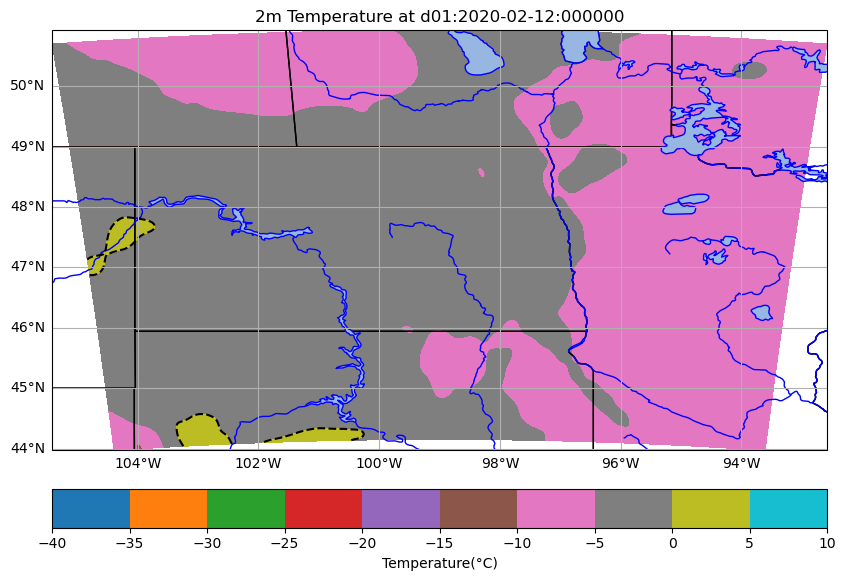

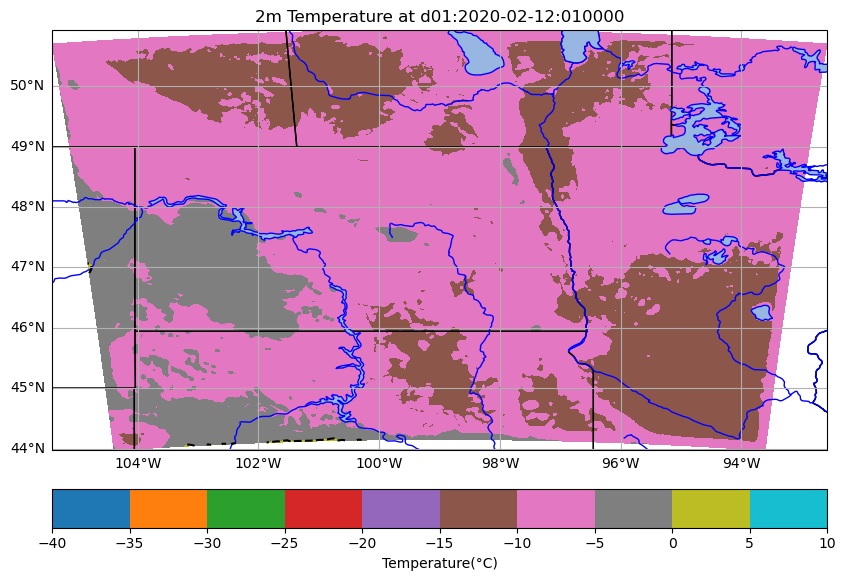

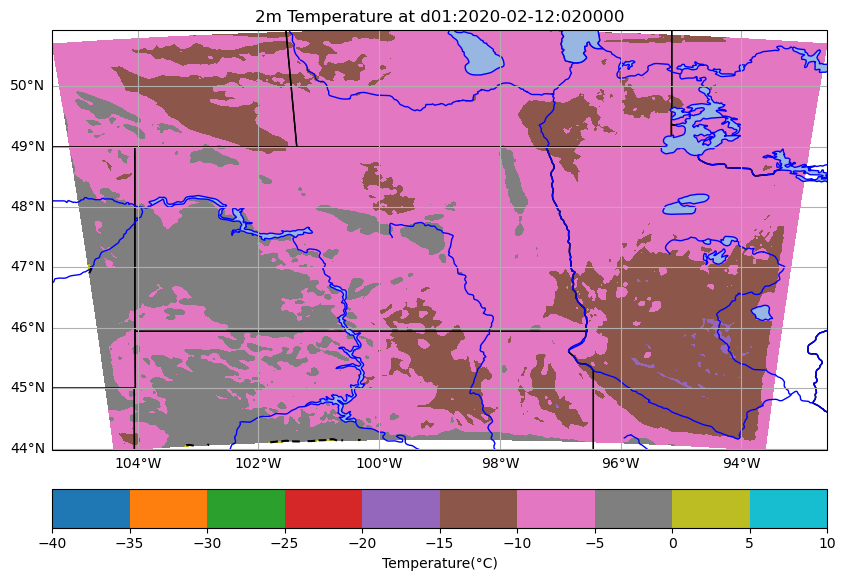

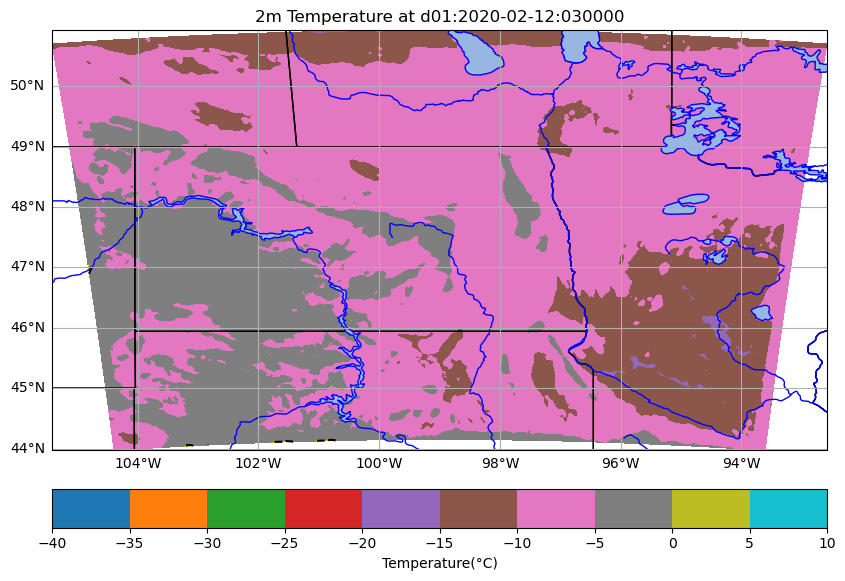

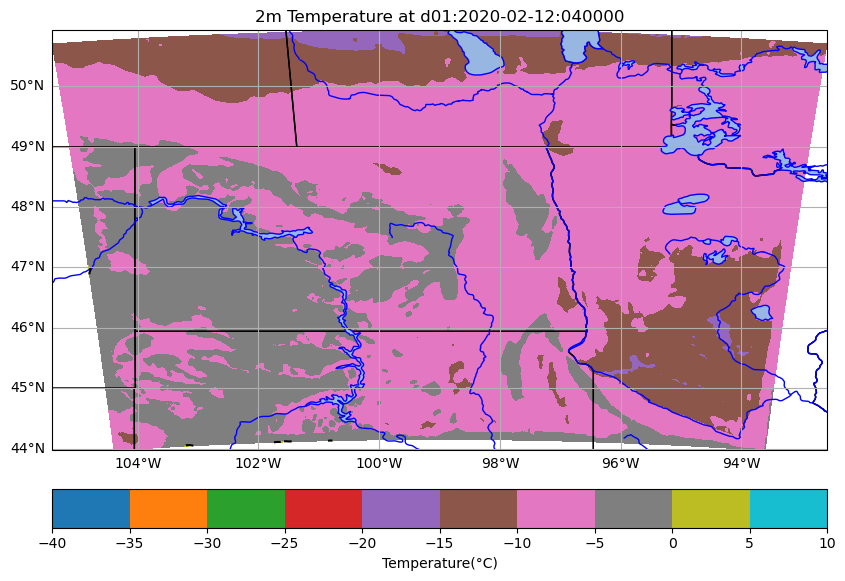

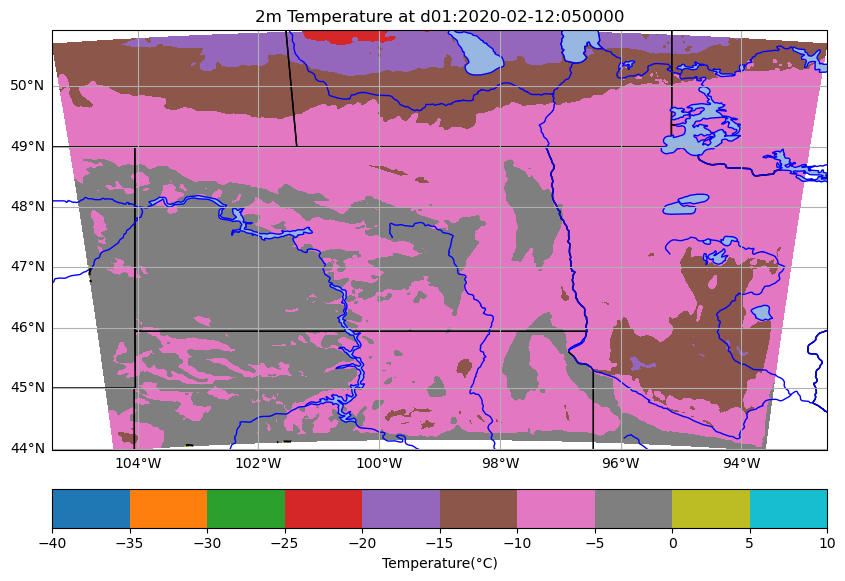

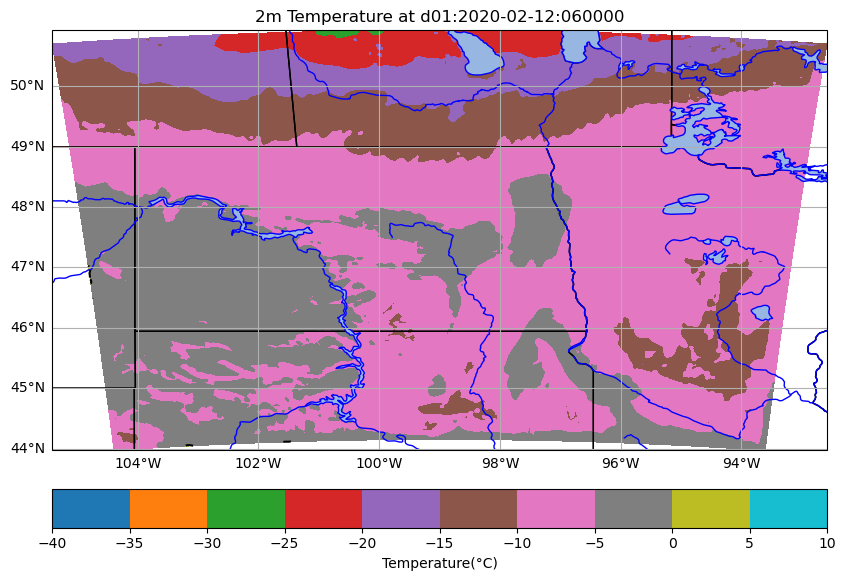

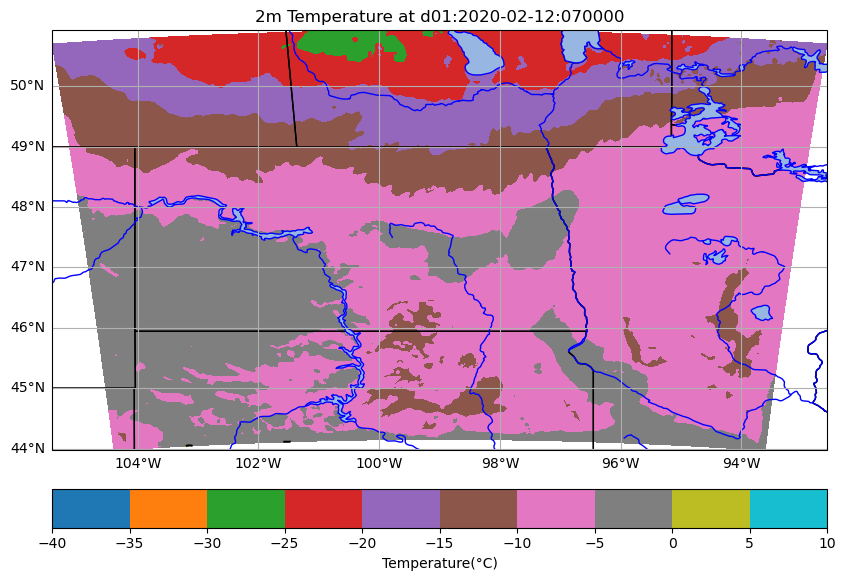

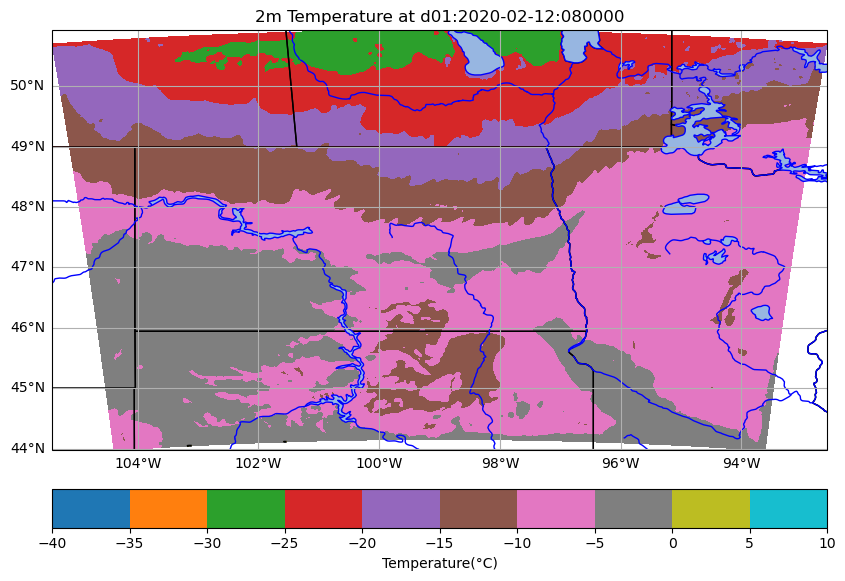

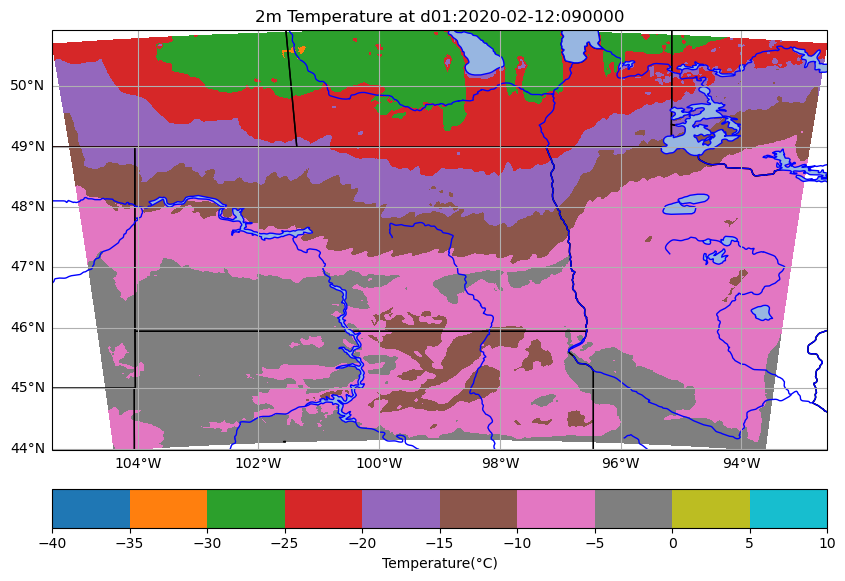

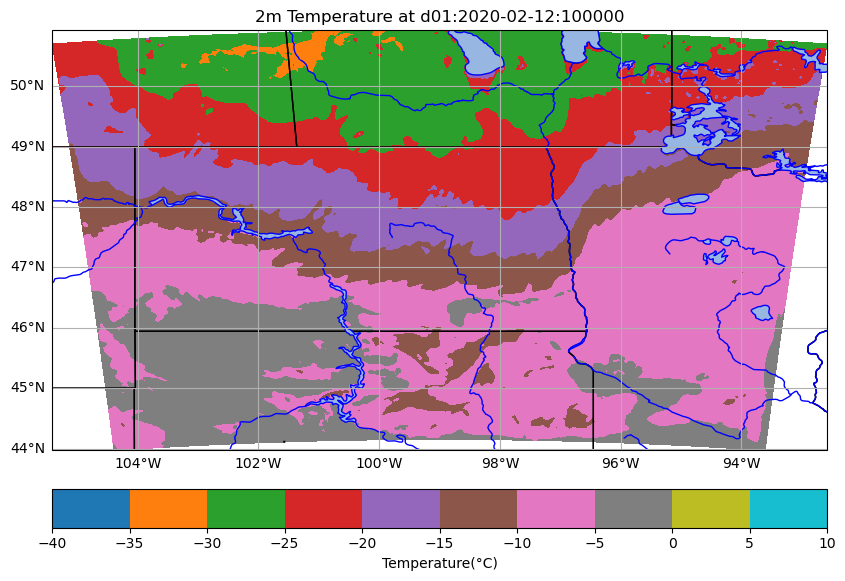

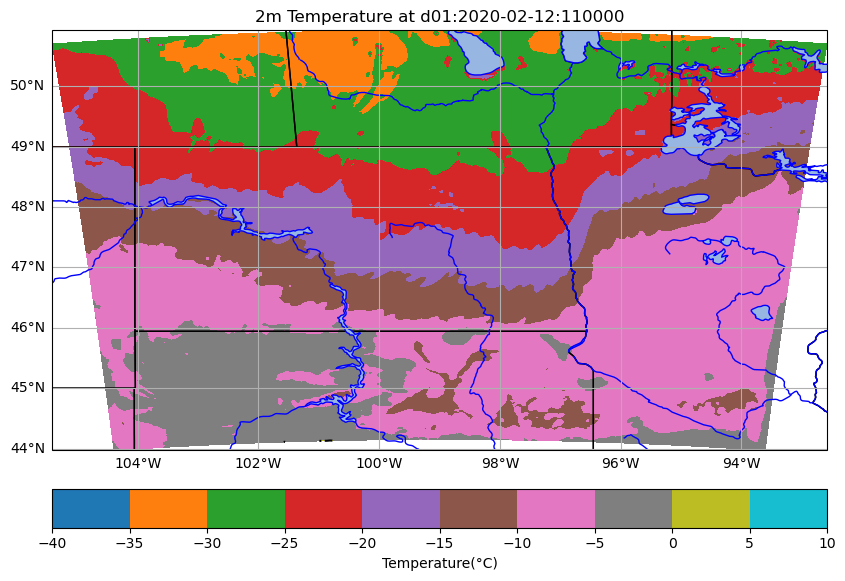

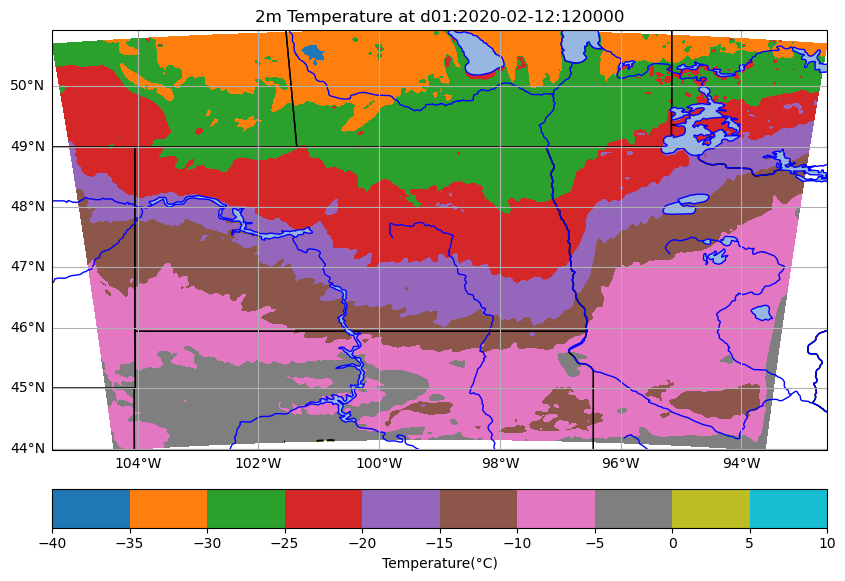

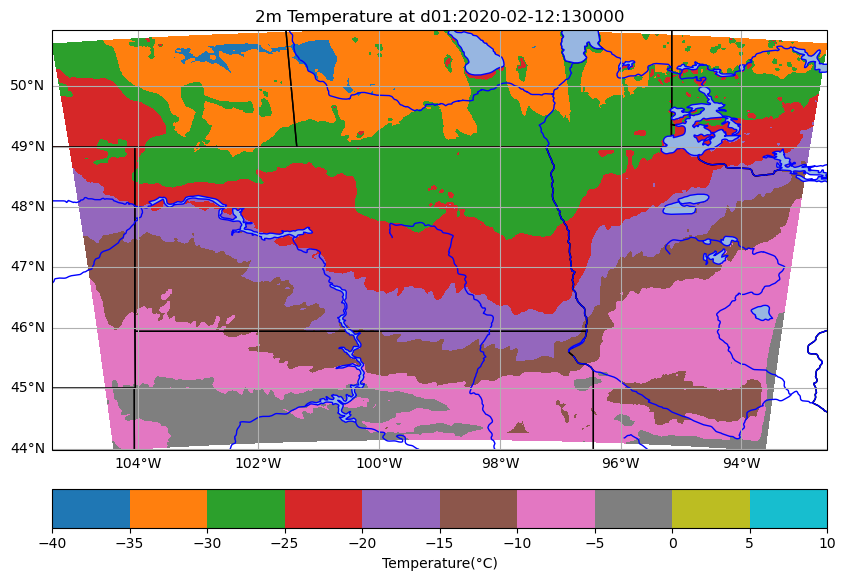

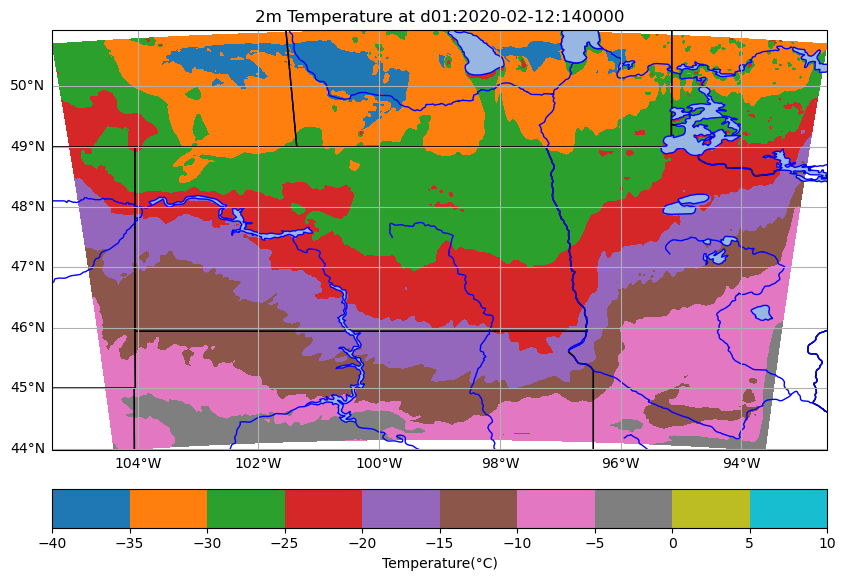

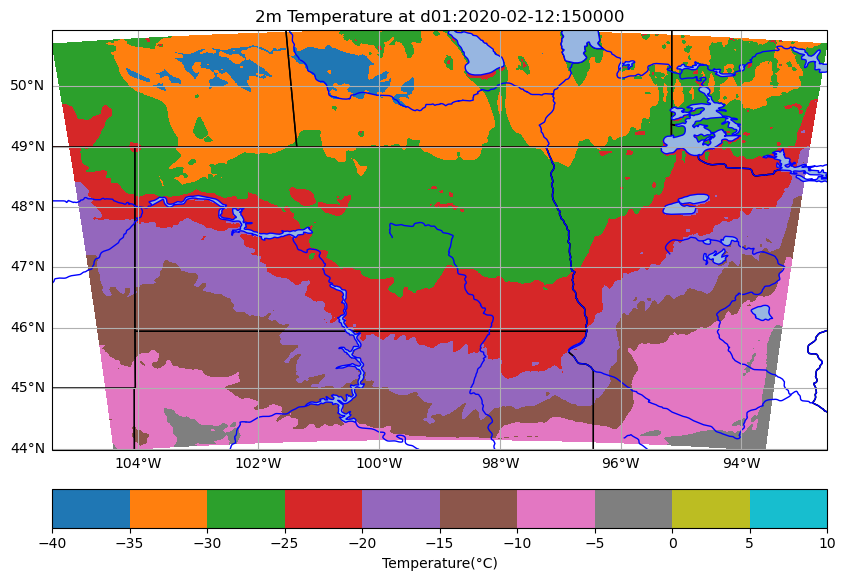

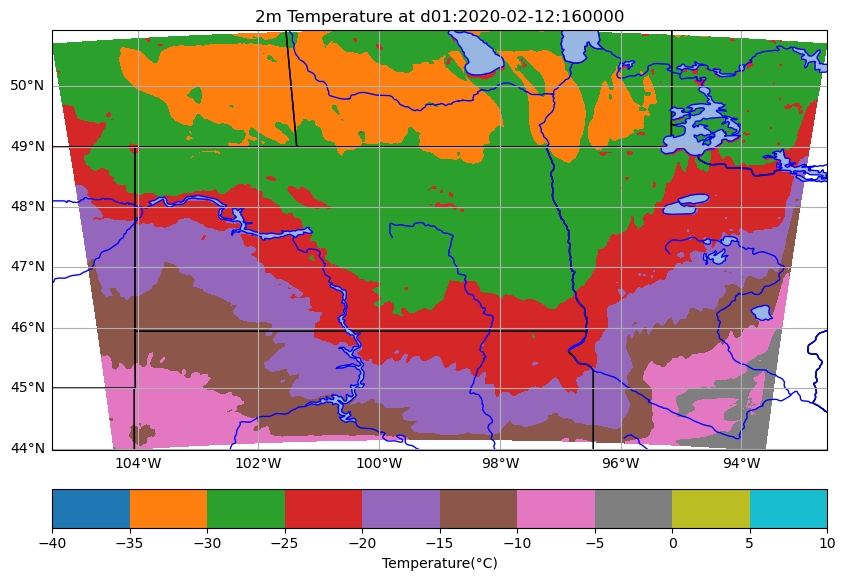

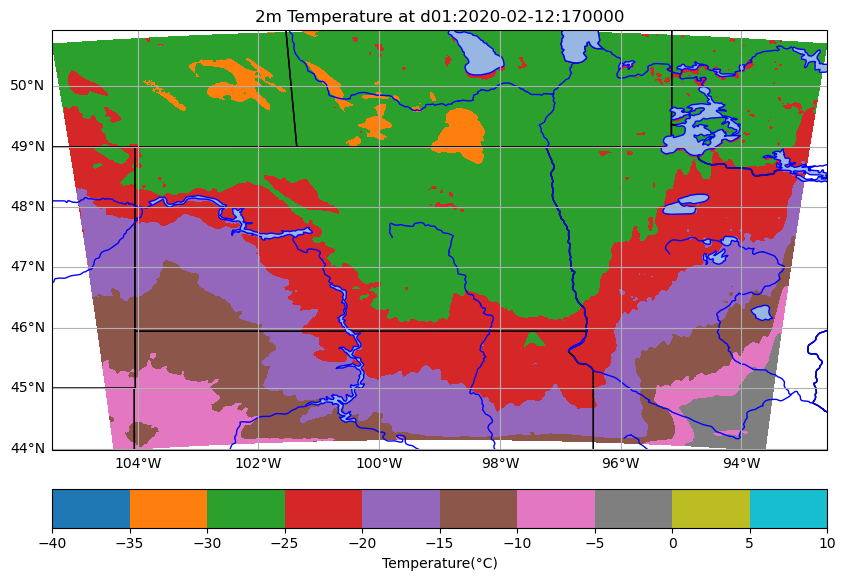

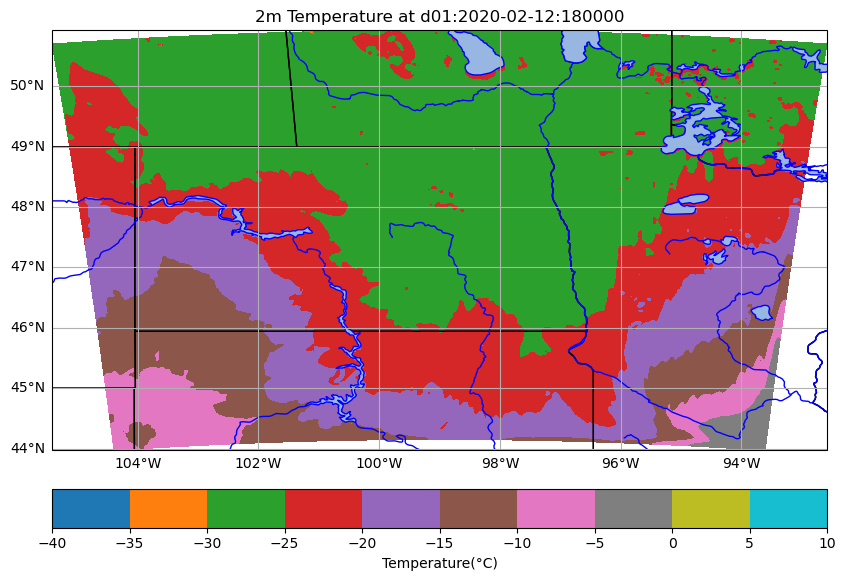

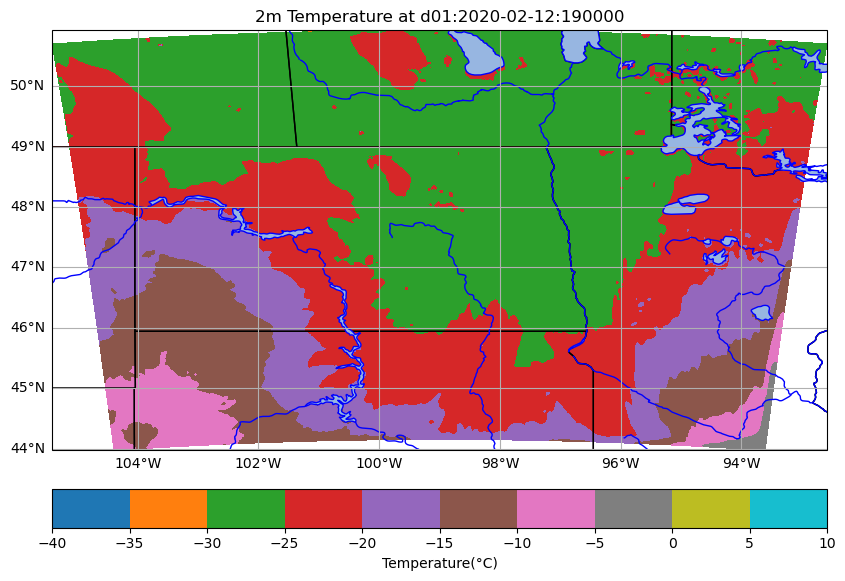

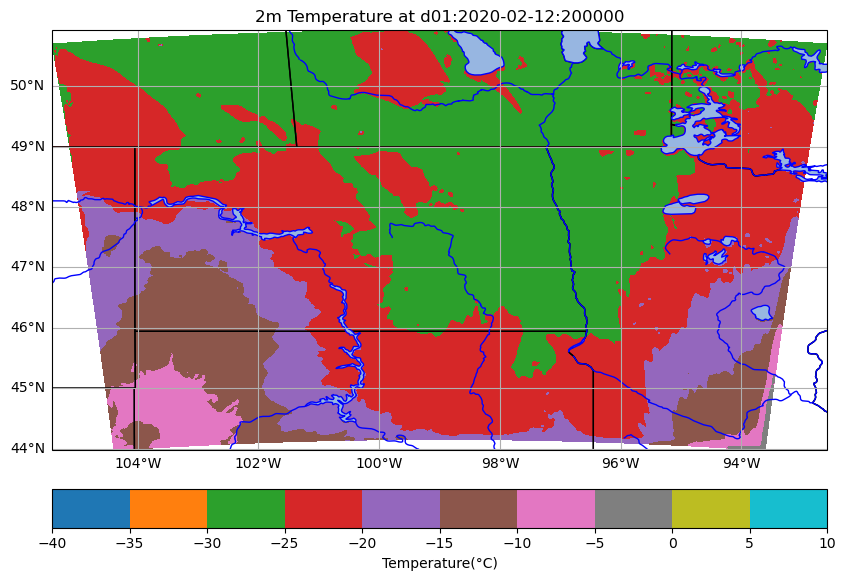

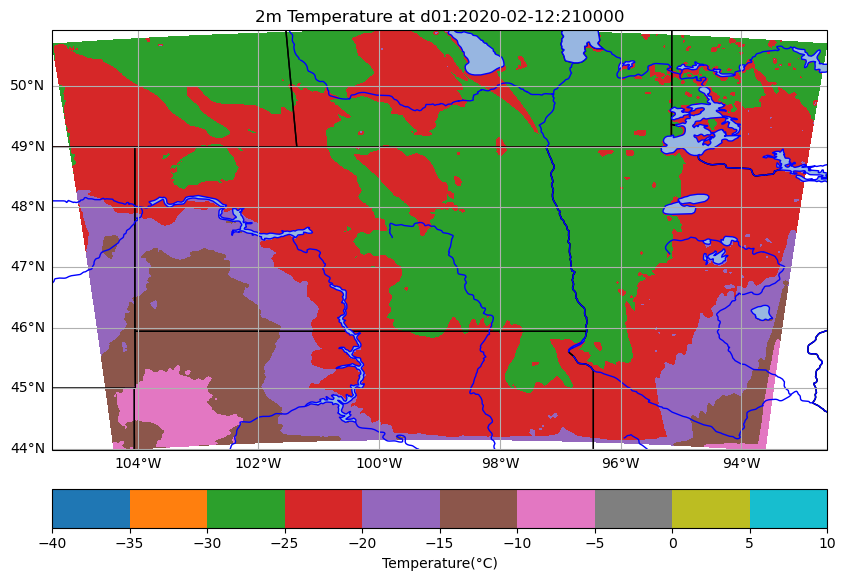

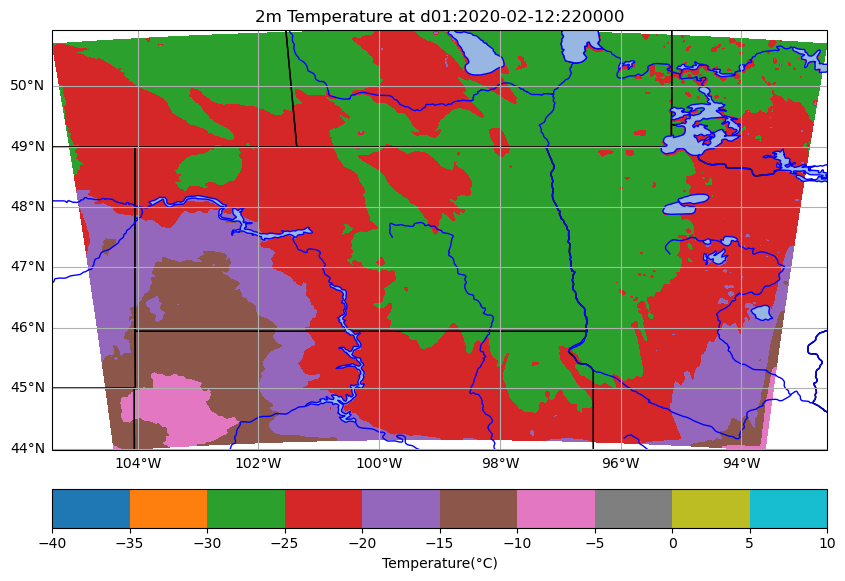

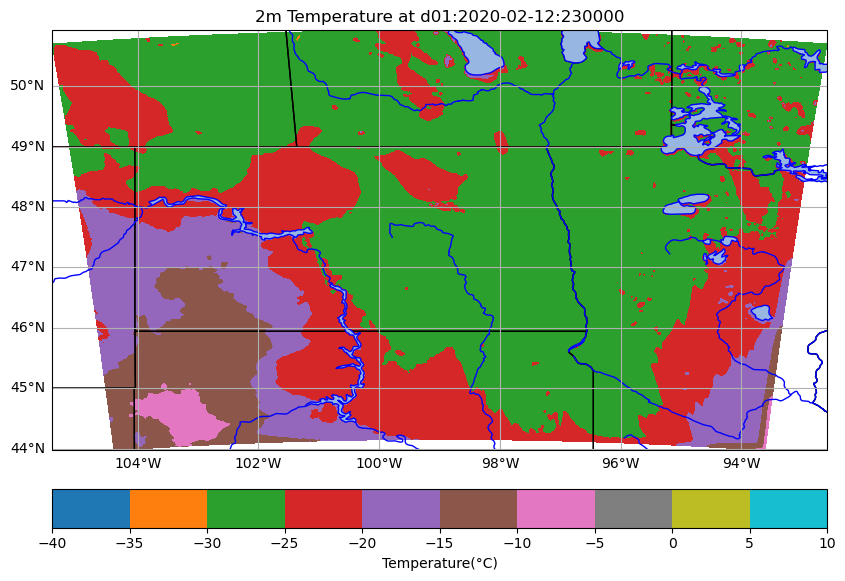

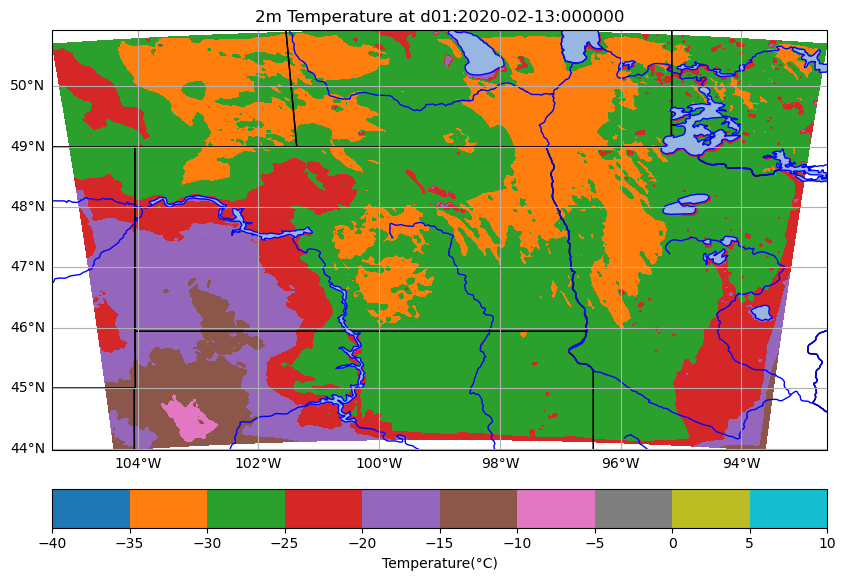

In [27]:
#Loop over each file 
for file in files: 
    #Open the file 
    with nc.Dataset(file, 'r') as f: 
        #Extract the data for a specific time; we will begin with the first one and loop will be carried for all 
        T2 = f.variables['T2'][0, :, :] - 273.15 #Converted to Celsius from Kelvin 
        XLAT = f.variables['XLAT'][0, :, :]
        XLONG = f.variables['XLONG'][0, :, :]
        
        #Extract the time information from the file names 
        time_info = os.path.basename(file).split('.')[0]
        time_info = time_info.replace('wrfout_', '').replace('%3A','').replace('_',':')
        
        #Create a new figure 
        fig = plt.figure(figsize=(10,10))
        
        #Create a new map projection 
        ax = plt.axes(projection=ccrs.PlateCarree())
        
        #Add feature to the maps 
        ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='red')
        ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='black')
        ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue')
        ax.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor='blue')
        
        #Plot the data with the color bar 
        cf = plt.contourf(XLONG, XLAT, T2, levels=levels, cmap='tab10',
                         norm=colors.Normalize(vmin=-40, vmax=10), transform=ccrs.PlateCarree())
        
        #Add a black dashed line to show 0 degree Celsius 
        plt.contour(XLONG, XLAT, T2, levels=[0], colors='black', linestyles='dashed', transform=ccrs.PlateCarree())
        
        #Add a color bar 
        cbar = plt.colorbar(cf, ticks=levels, orientation='horizontal', pad=0.05)
        cbar.set_label('Temperature(°C)')
        
        #Set the title with time information from the file name
        plt.title(f'2m Temperature at {time_info}')
        
        #Add latitude and longitude gridlines 
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = False 
        gl.right_labels = False 
        
    #Save the maps 
    plt.savefig(os.path.basename(file) + '.jpg', bbox_inches='tight')
    
    print(f'Plot for {file} created.')